Maya Asher, mia83, 1/20/23
# Type vs No Type
Using Emily Remirez's [ExemPy](https://github.com/emilyremirez/ExemPy) and the behavioral data from Peterson & Barney 1952, I will be comparing the performance of the model both with and without the `type` column.

In my BPhil research, I hope to show that the ExemPy model does better with gender categorizatoin data as opposed to without, so I will be simulating that with the PB52 data.

## Replicating Emily's Findings - Type
### Imports...

In [1]:
%load_ext autoreload
from ExemPy import *
from ExemPy.utils import *
from ExemPy.viz import *
from ExemPy.GCM import *
%aimport ExemPy, ExemPy.utils, ExemPy.viz, ExemPy.GCM
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns
sns.set(style='ticks', context='paper')
colors=["#e3c934","#68c4bf","#c51000","#287271"]
sns.set_palette(colors)

### Set up data
Read in PB52, convert Hz -> Bark, read in PB52 confusion matrix, and preview PB52

In [2]:
pb52 = pd.read_csv('pb52_data//pb52.csv')
pbcm = pd.read_csv('pb52_data//pbcm.csv').drop([0]).set_index('vowelChoice').rename_axis(None)
pb52 = HzToBark(pb52, ["F0", "F1", "F2", "F3"])
pb52.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
517,m,m,26,GOOSE,2,157,387,786,2518,1.458271,3.890737,7.143948,14.545386
739,w,f,37,NURSE,2,200,420,1740,1960,1.952407,4.201176,12.077946,12.875000
474,m,m,24,FOOT,1,157,380,1060,1950,1.458271,3.823761,8.880132,12.840716
363,m,m,19,KIT,2,130,370,1800,2750,1.137608,3.727382,12.304574,15.123397
1022,w,f,52,KIT,1,194,388,2622,3050,1.884643,3.900273,14.811733,15.791457


### Set default parameters

In [3]:
dimsvals={'z0' : 1,
          'z1' : 2.56,
          'z2' : 1.985,
          'z3' : 1.34}

dimslist = list(dimsvals.keys())

catslist = ['type', 'vowel']           # man, woman, or child; lexical set notation

cval = 25

exemplars = pb52
test = pb52

### Categorize

In [4]:
choices = multicat(
    testset = test,
    cloud = exemplars,
    cats = catslist,
    dimsdict = dimsvals,
    c = cval,
    N = 1,
    exclude_self = True)
choices

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3,typeChoice,typeProb,vowelChoice,vowelProb
0,m,m,1,FLEECE,1,160,240,2280,2850,1.493396,2.394727,13.886698,15.355343,m,0.999809,FLEECE,0.999925
1,m,m,1,FLEECE,2,186,280,2400,2790,1.793700,2.821250,14.227798,15.217347,m,0.994734,FLEECE,0.998462
2,m,m,1,KIT,1,203,390,2030,2640,1.986149,3.919319,13.110175,14.856609,m,0.982181,KIT,0.973843
3,m,m,1,KIT,2,192,310,1980,2550,1.861970,3.131278,12.943046,14.628647,m,0.999517,KIT,0.996075
4,m,m,1,DRESS,1,161,490,1870,2420,1.505083,4.832000,12.560000,14.282831,m,0.739049,DRESS,0.572512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,c,f,76,FOOT,2,322,610,1550,3400,3.253006,5.833463,11.309174,16.476343,c,0.999919,FOOT,0.983871
1516,c,f,76,GOOSE,1,345,520,1250,3460,3.482777,5.091452,9.910031,16.584871,c,0.993950,FOOT,0.934974
1517,c,f,76,GOOSE,2,334,500,1140,3380,3.373461,4.919187,9.329161,16.439625,c,0.998422,FOOT,0.825487
1518,c,f,76,NURSE,1,308,740,1850,2160,3.110864,6.817926,12.487979,13.525728,c,0.495870,NURSE,0.503462


### Check accuracy

In [5]:
acc = checkaccuracy(choices,catslist)
acc.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3,typeChoice,typeProb,vowelChoice,vowelProb,typeAcc,vowelAcc
140,m,m,8,FLEECE,1,105,230,2480,3200,0.833220,2.285662,14.444955,16.096357,m,0.996506,FLEECE,0.999897,y,y
1513,c,f,76,THOUGHT,2,330,830,1250,3250,3.333450,7.445735,9.910031,16.194088,c,0.749862,PALM,0.639548,y,n
177,m,m,9,GOOSE,2,183,312,1020,2300,1.759421,3.151655,8.646577,13.944883,m,0.981173,GOOSE,0.985589,y,y
94,m,m,5,FOOT,1,133,470,1040,1990,1.173645,4.655473,8.764133,12.976810,m,0.999947,FOOT,0.996205,y,y
1511,c,f,76,PALM,2,314,1070,1460,2950,3.171996,8.937558,10.915205,15.577841,c,0.878933,PALM,0.928524,y,y


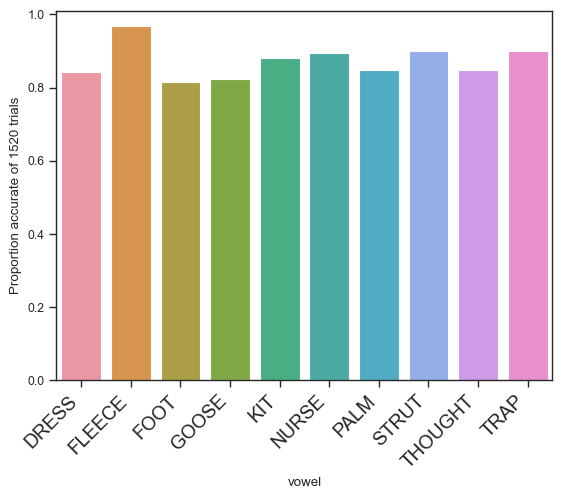

<Axes: xlabel='vowel', ylabel='Proportion accurate of 1520 trials'>

In [6]:
accplot(acc, 'vowel')

In [7]:
propcorr(acc,'vowel')

,vowel,propcorr
0,DRESS,0.842105
1,FLEECE,0.967105
2,FOOT,0.815789
3,GOOSE,0.822368
4,KIT,0.881579
5,NURSE,0.894737
6,PALM,0.848684
7,STRUT,0.901316
8,THOUGHT,0.848684
9,TRAP,0.901316


In [8]:
print("Overall vowel accuracy: " + str(overallacc(acc,'vowel')))

Overall vowel accuracy: 0.8723684210526316


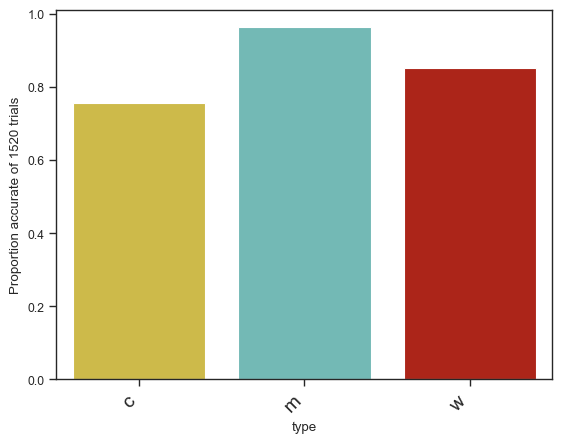

<Axes: xlabel='type', ylabel='Proportion accurate of 1520 trials'>

In [9]:
accplot(acc,'type')

In [10]:
propcorr(acc,'type')

,type,propcorr
0,c,0.756667
1,m,0.962121
2,w,0.851786


In [11]:
print("Overall type accuracy: " + str(overallacc(acc,'type')))

Overall type accuracy: 0.8809210526315789


### Get confusion matrices
* First, we'll look at the model's confusion matrix, then the actual PB52 matix.
* Then, we will subtract them and get the difference.
* Finally, we'll get the RMS and r both with 0s and without

In [12]:
cm = confusion(choices,catslist)['vowel']
cm

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.84,0.00,0.00,0.00,0.12,0.01,0.00,0.00,0.00,0.03
FLEECE,0.00,0.97,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
FOOT,0.00,0.00,0.82,0.13,0.00,0.00,0.00,0.03,0.02,0.00
GOOSE,0.00,0.00,0.14,0.82,0.00,0.00,0.00,0.00,0.04,0.00
KIT,0.07,0.05,0.00,0.00,0.88,0.00,0.00,0.00,0.00,0.00
NURSE,0.06,0.00,0.00,0.00,0.02,0.89,0.00,0.00,0.00,0.03
PALM,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.09,0.06,0.00
STRUT,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.90,0.01,0.00
THOUGHT,0.00,0.00,0.01,0.03,0.00,0.00,0.09,0.02,0.85,0.00
TRAP,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90


In [13]:
pbcm

,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.658,0.013,0.004,0.001,0.237,0.011,0.000,0.003,0.000,0.072
FLEECE,0.006,0.962,0.000,0.000,0.031,0.000,0.000,0.000,0.000,0.000
FOOT,0.001,0.000,0.620,0.284,0.002,0.009,0.001,0.052,0.031,0.000
GOOSE,0.000,0.002,0.090,0.891,0.002,0.002,0.000,0.007,0.007,0.000
KIT,0.067,0.251,0.006,0.000,0.670,0.001,0.000,0.001,0.000,0.003
NURSE,0.040,0.003,0.030,0.007,0.041,0.866,0.000,0.009,0.000,0.003
PALM,0.002,0.000,0.006,0.001,0.000,0.000,0.550,0.136,0.305,0.001
STRUT,0.009,0.000,0.027,0.001,0.001,0.012,0.128,0.747,0.068,0.007
THOUGHT,0.000,0.000,0.130,0.059,0.000,0.000,0.059,0.080,0.672,0.000
TRAP,0.280,0.001,0.003,0.000,0.006,0.019,0.040,0.020,0.000,0.632


In [14]:
cm - pbcm #differences

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.182,-0.013,-0.004,-0.001,-0.117,-0.001,0.000,-0.003,0.000,-0.042
FLEECE,-0.006,0.008,0.000,0.000,-0.001,0.000,0.000,0.000,0.000,0.000
FOOT,-0.001,0.000,0.200,-0.154,-0.002,-0.009,-0.001,-0.022,-0.011,0.000
GOOSE,0.000,-0.002,0.050,-0.071,-0.002,-0.002,0.000,-0.007,0.033,0.000
KIT,0.003,-0.201,-0.006,0.000,0.210,-0.001,0.000,-0.001,0.000,-0.003
NURSE,0.020,-0.003,-0.030,-0.007,-0.021,0.024,0.000,-0.009,0.000,0.027
PALM,-0.002,0.000,-0.006,-0.001,0.000,0.000,0.300,-0.046,-0.245,-0.001
STRUT,-0.009,0.000,-0.027,-0.001,-0.001,-0.012,-0.038,0.153,-0.058,-0.007
THOUGHT,0.000,0.000,-0.120,-0.029,0.000,0.000,0.031,-0.060,0.178,0.000
TRAP,-0.180,-0.001,-0.003,0.000,-0.006,-0.019,-0.040,-0.020,0.000,0.268


In [15]:
# flatten and combine confusion matrices
pbcmfl = pd.Series(pbcm.stack(), name = "PB")
cmfl = pd.Series(cm.stack(), name = "GCM")
cms = pd.concat([pbcmfl, cmfl], axis = 1)

#Remove 0s (which correlate with each other)
cmsnan = cms.replace(0, np.nan) 

print("0s included")
print("RMS =  ", (((cms.PB-cms.GCM) ** 2).mean()) ** .5)
print("r =    ", (cms['PB'].corr(cms['GCM'])))
print("")
print("0s removed")
print("RMS =  ",(((cmsnan.PB-cmsnan.GCM) ** 2).mean()) ** .5)
print("r =    ", cmsnan['PB'].corr(cmsnan['GCM']))

0s included
RMS =   0.0741105255682349
r =     0.9645813339553275

0s removed
RMS =   0.12843085629429107
r =     0.9519894540508785


## Again - Without Type!
I made a separate csv called `pb52_nt` and deleted the "type" column. This file will be used in place of `pb52` and we will attempt to have the model process it the same way.
### Set up data

In [16]:
pb52_nt = pd.read_csv('pb52_data//pb52_nt.csv')
pbcm = pd.read_csv('pb52_data//pbcm.csv').drop([0]).set_index('vowelChoice').rename_axis(None)
pb52_nt = HzToBark(pb52_nt, ["F0", "F1", "F2", "F3"])
pb52_nt.sample(5)

,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1391,m,70,PALM,2,227,910,1360,2950,2.252748,7.970732,10.452410,15.577841
1341,f,68,FLEECE,2,262,340,3100,3400,2.631215,3.433217,15.895099,16.476343
1056,f,53,GOOSE,1,300,420,1045,3060,3.028850,4.201176,8.793278,15.812351
542,m,28,KIT,1,115,440,1750,2400,0.955855,4.385167,12.116226,14.227798
1485,m,75,DRESS,2,272,565,2440,3120,2.737168,5.469069,14.337364,15.935984


### Set default parameters
This time, we'll remove the 'type' category from `catslist`

In [17]:
dimsvals={'z0' : 1,
          'z1' : 2.56,
          'z2' : 1.985,
          'z3' : 1.34}

dimslist = list(dimsvals.keys())

catslist = ['vowel']           # lexical set notation

cval = 25

exemplars = pb52_nt
test = pb52_nt

### Categorize
Rather than having 1520 rows x 17 columns, we now have 1520 rows x 14 columns

In [18]:
choices_nt = multicat(
    testset = test,
    cloud = exemplars,
    cats = catslist,
    dimsdict = dimsvals,
    c = cval,
    N = 1,
    exclude_self = True)
choices_nt

,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb
0,m,1,FLEECE,1,160,240,2280,2850,1.493396,2.394727,13.886698,15.355343,FLEECE,0.999925
1,m,1,FLEECE,2,186,280,2400,2790,1.793700,2.821250,14.227798,15.217347,FLEECE,0.998462
2,m,1,KIT,1,203,390,2030,2640,1.986149,3.919319,13.110175,14.856609,KIT,0.973843
3,m,1,KIT,2,192,310,1980,2550,1.861970,3.131278,12.943046,14.628647,KIT,0.996075
4,m,1,DRESS,1,161,490,1870,2420,1.505083,4.832000,12.560000,14.282831,DRESS,0.572512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,f,76,FOOT,2,322,610,1550,3400,3.253006,5.833463,11.309174,16.476343,FOOT,0.983871
1516,f,76,GOOSE,1,345,520,1250,3460,3.482777,5.091452,9.910031,16.584871,FOOT,0.934974
1517,f,76,GOOSE,2,334,500,1140,3380,3.373461,4.919187,9.329161,16.439625,FOOT,0.825487
1518,f,76,NURSE,1,308,740,1850,2160,3.110864,6.817926,12.487979,13.525728,NURSE,0.503462


### Check accuracy
Now for the fun part! Let's see how the model did without the assistance of the type category.

In [19]:
acc_nt = checkaccuracy(choices_nt,catslist)
acc_nt.sample(5)

,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb,vowelAcc
400,m,21,FLEECE,1,155,280,2400,2910,1.434799,2.821250,14.227798,15.489938,FLEECE,0.995492,y
5,m,1,DRESS,2,155,570,1700,2600,1.434799,5.510198,11.922732,14.756404,DRESS,0.860062,y
323,m,17,KIT,2,115,346,1930,2390,0.955855,3.492663,12.771620,14.200092,KIT,0.963864,y
314,m,16,FOOT,1,143,443,1273,2430,1.293029,4.412501,10.026489,14.310159,FOOT,0.977764,y
531,m,27,PALM,2,125,670,1080,2300,1.077314,6.299924,8.994605,13.944883,PALM,0.699228,y


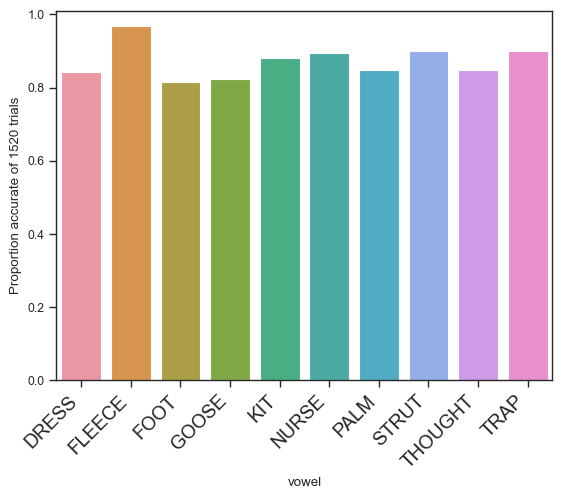

<Axes: xlabel='vowel', ylabel='Proportion accurate of 1520 trials'>

In [20]:
accplot(acc_nt, 'vowel')

In [21]:
propcorr(acc_nt,'vowel')

,vowel,propcorr
0,DRESS,0.842105
1,FLEECE,0.967105
2,FOOT,0.815789
3,GOOSE,0.822368
4,KIT,0.881579
5,NURSE,0.894737
6,PALM,0.848684
7,STRUT,0.901316
8,THOUGHT,0.848684
9,TRAP,0.901316


In [22]:
print("Overall vowel accuracy: " + str(overallacc(acc_nt,'vowel')))

Overall vowel accuracy: 0.8723684210526316


### Get confusion matrices

In [23]:
cm_nt = confusion(choices_nt,catslist)['vowel']
cm_nt

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.84,0.00,0.00,0.00,0.12,0.01,0.00,0.00,0.00,0.03
FLEECE,0.00,0.97,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
FOOT,0.00,0.00,0.82,0.13,0.00,0.00,0.00,0.03,0.02,0.00
GOOSE,0.00,0.00,0.14,0.82,0.00,0.00,0.00,0.00,0.04,0.00
KIT,0.07,0.05,0.00,0.00,0.88,0.00,0.00,0.00,0.00,0.00
NURSE,0.06,0.00,0.00,0.00,0.02,0.89,0.00,0.00,0.00,0.03
PALM,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.09,0.06,0.00
STRUT,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.90,0.01,0.00
THOUGHT,0.00,0.00,0.01,0.03,0.00,0.00,0.09,0.02,0.85,0.00
TRAP,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90


In [24]:
pbcm

,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.658,0.013,0.004,0.001,0.237,0.011,0.000,0.003,0.000,0.072
FLEECE,0.006,0.962,0.000,0.000,0.031,0.000,0.000,0.000,0.000,0.000
FOOT,0.001,0.000,0.620,0.284,0.002,0.009,0.001,0.052,0.031,0.000
GOOSE,0.000,0.002,0.090,0.891,0.002,0.002,0.000,0.007,0.007,0.000
KIT,0.067,0.251,0.006,0.000,0.670,0.001,0.000,0.001,0.000,0.003
NURSE,0.040,0.003,0.030,0.007,0.041,0.866,0.000,0.009,0.000,0.003
PALM,0.002,0.000,0.006,0.001,0.000,0.000,0.550,0.136,0.305,0.001
STRUT,0.009,0.000,0.027,0.001,0.001,0.012,0.128,0.747,0.068,0.007
THOUGHT,0.000,0.000,0.130,0.059,0.000,0.000,0.059,0.080,0.672,0.000
TRAP,0.280,0.001,0.003,0.000,0.006,0.019,0.040,0.020,0.000,0.632


In [25]:
cm_nt - pbcm #differences

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.182,-0.013,-0.004,-0.001,-0.117,-0.001,0.000,-0.003,0.000,-0.042
FLEECE,-0.006,0.008,0.000,0.000,-0.001,0.000,0.000,0.000,0.000,0.000
FOOT,-0.001,0.000,0.200,-0.154,-0.002,-0.009,-0.001,-0.022,-0.011,0.000
GOOSE,0.000,-0.002,0.050,-0.071,-0.002,-0.002,0.000,-0.007,0.033,0.000
KIT,0.003,-0.201,-0.006,0.000,0.210,-0.001,0.000,-0.001,0.000,-0.003
NURSE,0.020,-0.003,-0.030,-0.007,-0.021,0.024,0.000,-0.009,0.000,0.027
PALM,-0.002,0.000,-0.006,-0.001,0.000,0.000,0.300,-0.046,-0.245,-0.001
STRUT,-0.009,0.000,-0.027,-0.001,-0.001,-0.012,-0.038,0.153,-0.058,-0.007
THOUGHT,0.000,0.000,-0.120,-0.029,0.000,0.000,0.031,-0.060,0.178,0.000
TRAP,-0.180,-0.001,-0.003,0.000,-0.006,-0.019,-0.040,-0.020,0.000,0.268


In [26]:
# flatten and combine confusion matrices
pbcmfl = pd.Series(pbcm.stack(), name = "PB")
cmfl = pd.Series(cm_nt.stack(), name = "GCM")
cms = pd.concat([pbcmfl, cmfl], axis = 1)

#Remove 0s (which correlate with each other)
cmsnan = cms.replace(0, np.nan) 

print("0s included")
print("RMS =  ", (((cms.PB-cms.GCM) ** 2).mean()) ** .5)
print("r =    ", (cms['PB'].corr(cms['GCM'])))
print("")
print("0s removed")
print("RMS =  ",(((cmsnan.PB-cmsnan.GCM) ** 2).mean()) ** .5)
print("r =    ", cmsnan['PB'].corr(cmsnan['GCM']))

0s included
RMS =   0.0741105255682349
r =     0.9645813339553275

0s removed
RMS =   0.12843085629429107
r =     0.9519894540508785


## Okay, so that didn't work - let's try something else
Rather than categorizing the dataset with respect to itself, let's try just categorizing one stimulus using our `pb52_nt` data.

### Set default parameters

In [27]:
dimsvals={'z0' : 1,
          'z1' : 2.56,
          'z2' : 1.985,
          'z3' : 1.34}

dimslist = list(dimsvals.keys())

catslist = ['vowel']           # lexical set notation

cval = 25

### More set up
* Randomly select a stimulus
* Add a resting activation N value of 1 to all stored exemplars
* Exclude the stimulus from the exemplar cloud (so it won't be compared to itself)

In [28]:
stim = pb52_nt.sample()
stim

,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1251,f,63,PALM,2,283,980,1300,3100,2.852626,8.406667,10.161104,15.895099


In [29]:
exemplars = reset_N(pb52_nt, N = 1)
exemplars = exclude(exemplars, stim, exclude_self = True)
exemplars.sample()

,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3,N
52,m,3.0,THOUGHT,1.0,92.0,550.0,870.0,2300.0,0.672008,5.344701,7.711943,13.944883,1


In [30]:
o = stim.isin(exemplars)
print('Is stim contained within exemplars?')
o

Is stim contained within exemplars?


,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
1251,False,False,False,False,False,False,False,False,False,False,False,False


### Calculate activation of each exemplar wrt the stimulus
Plot activation:
* exemplars plotted in F2, F1 (Bark) space
* stimulus plotted in a blue X
* color = exemplar category
* size = activation

In [31]:
activation_df = activation(
    testset = stim,
    cloud = reset_N(exemplars, N=1),
    dimsdict = dimsvals,
    c = cval
    )
print("---- Stimulus info ----")
print(stim[['vowel', 'speaker']])
print("")
print(stim[['F0', 'F1', 'F2', 'F3']])
print("-----------------------")
smallactivdf = activation_df[['a',
                      'dist',
                      'vowel_ex',
                      'F0_ex',
                      "F1_ex",
                      "F2_ex",
                      "F3_ex"]]
gettestset(smallactivdf, "vowel_ex", n = 2)

---- Stimulus info ----
     vowel  speaker
1251  PALM       63

       F0   F1    F2    F3
1251  283  980  1300  3100
-----------------------


,a,dist,vowel_ex,F0_ex,F1_ex,F2_ex,F3_ex
921,5.188806e-39,3.526173,FLEECE,286.0,310.0,2900.0,3400.0
460,6.504617e-36,3.240822,FLEECE,148.0,280.0,2450.0,2700.0
443,6.449490e-25,2.228025,KIT,120.0,430.0,1710.0,2350.0
1163,7.234697e-31,2.776050,KIT,262.0,440.0,2480.0,3240.0
985,8.887590e-25,2.215199,DRESS,207.0,538.0,2175.0,2880.0
684,1.147710e-24,2.204971,DRESS,220.0,620.0,2300.0,3200.0
1066,1.109810e-21,1.930004,TRAP,212.0,710.0,2120.0,2600.0
467,2.451282e-21,1.898307,TRAP,140.0,685.0,1780.0,2160.0
1068,9.915814e-14,1.197682,STRUT,221.0,800.0,1520.0,2380.0
629,6.714248e-18,1.581692,STRUT,125.0,625.0,1312.0,2250.0


<Axes: xlabel='z2', ylabel='z1'>

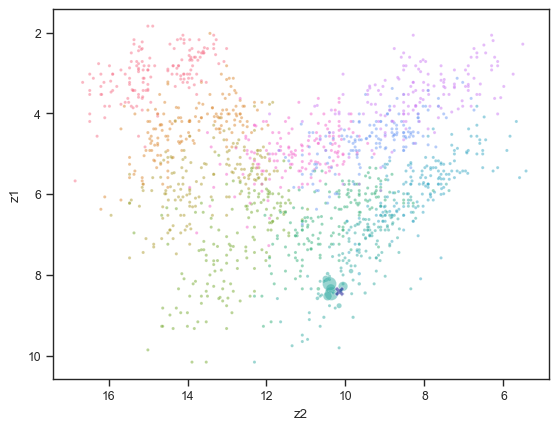

In [32]:
act = getactiv(activation_df, 'z2', 'z1', 'vowel')
activplot(act, 'z2', 'z1', 'vowel', stim)

### Check for "veridical perception"

In [33]:
accu = checkaccuracy(choices, catslist)
print('Was vowel categorized accurately?          ' + accu.iloc[0]['vowelAcc'])

Was vowel categorized accurately?          y


## So...I think I'm missing something here
The graphs look identical and the first thing I did gave identical results as well. I feel like one of two things is going on...
* I didn't fully remove 'type' from the model
* Or, 'type' really has no effect on how the model works

In [34]:
import pandas as pd
pb52_noz = pb52.drop(["z2"], axis=1)
pb52_noz

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z3
0,m,m,1,FLEECE,1,160,240,2280,2850,1.493396,2.394727,15.355343
1,m,m,1,FLEECE,2,186,280,2400,2790,1.793700,2.821250,15.217347
2,m,m,1,KIT,1,203,390,2030,2640,1.986149,3.919319,14.856609
3,m,m,1,KIT,2,192,310,1980,2550,1.861970,3.131278,14.628647
4,m,m,1,DRESS,1,161,490,1870,2420,1.505083,4.832000,14.282831
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,c,f,76,FOOT,2,322,610,1550,3400,3.253006,5.833463,16.476343
1516,c,f,76,GOOSE,1,345,520,1250,3460,3.482777,5.091452,16.584871
1517,c,f,76,GOOSE,2,334,500,1140,3380,3.373461,4.919187,16.439625
1518,c,f,76,NURSE,1,308,740,1850,2160,3.110864,6.817926,13.525728


In [35]:
dimsvals={'z0' : 1,
          'z1' : 2.56,
          'z3' : 1.34}


dimslist = list(dimsvals.keys())

catslist = ['type', 'vowel']           # man, woman, or child; lexical set notation

cval = 25

exemplars = pb52_noz
test = pb52_noz

In [36]:
choices = multicat(
    testset = test,
    cloud = exemplars,
    cats = catslist,
    dimsdict = dimsvals,
    c = cval,
    N = 1,
    exclude_self = True)
choices

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z3,typeChoice,typeProb,vowelChoice,vowelProb
0,m,m,1,FLEECE,1,160,240,2280,2850,1.493396,2.394727,15.355343,m,0.999596,FLEECE,0.999474
1,m,m,1,FLEECE,2,186,280,2400,2790,1.793700,2.821250,15.217347,m,0.945201,FLEECE,0.929117
2,m,m,1,KIT,1,203,390,2030,2640,1.986149,3.919319,14.856609,w,0.791139,GOOSE,0.458989
3,m,m,1,KIT,2,192,310,1980,2550,1.861970,3.131278,14.628647,w,0.837931,GOOSE,0.819221
4,m,m,1,DRESS,1,161,490,1870,2420,1.505083,4.832000,14.282831,m,0.854755,FOOT,0.528245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,c,f,76,FOOT,2,322,610,1550,3400,3.253006,5.833463,16.476343,c,0.970124,KIT,0.326469
1516,c,f,76,GOOSE,1,345,520,1250,3460,3.482777,5.091452,16.584871,c,0.963039,KIT,0.420403
1517,c,f,76,GOOSE,2,334,500,1140,3380,3.373461,4.919187,16.439625,c,0.907088,KIT,0.449130
1518,c,f,76,NURSE,1,308,740,1850,2160,3.110864,6.817926,13.525728,m,0.756319,PALM,0.432136


In [37]:
acc = checkaccuracy(choices,catslist)
acc.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z3,typeChoice,typeProb,vowelChoice,vowelProb,typeAcc,vowelAcc
485,m,m,25,DRESS,2,105,504,1995,2780,0.833220,4.953864,15.194008,m,0.825786,DRESS,0.691786,y,y
537,m,m,27,GOOSE,2,140,280,1000,2160,1.257333,2.821250,13.525728,m,0.999992,GOOSE,0.999983,y,y
209,m,m,11,STRUT,2,136,627,1038,2360,1.209580,5.967824,14.116204,m,0.993705,STRUT,0.508090,y,y
1388,c,m,70,STRUT,1,236,706,1410,3200,2.351220,6.569722,16.096357,w,0.734129,DRESS,0.354374,n,n
1410,c,m,71,PALM,1,242,970,1450,3260,2.416421,8.345666,16.213410,c,0.811953,TRAP,0.501137,y,n


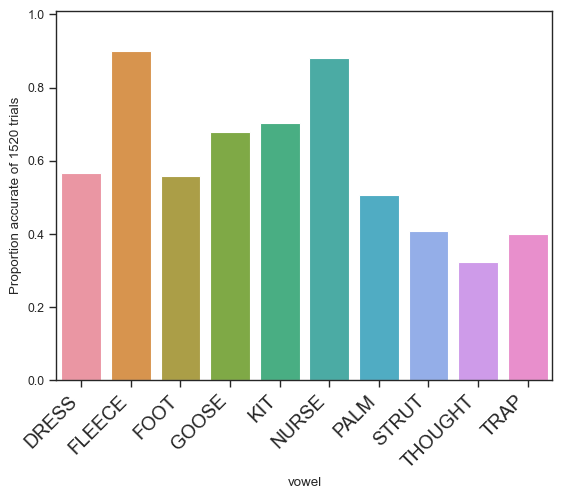

<Axes: xlabel='vowel', ylabel='Proportion accurate of 1520 trials'>

In [38]:
accplot(acc, 'vowel')

In [39]:
propcorr(acc,'vowel')

,vowel,propcorr
0,DRESS,0.565789
1,FLEECE,0.901316
2,FOOT,0.559211
3,GOOSE,0.677632
4,KIT,0.703947
5,NURSE,0.881579
6,PALM,0.506579
7,STRUT,0.407895
8,THOUGHT,0.322368
9,TRAP,0.401316


In [40]:
print("Overall vowel accuracy: " + str(overallacc(acc,'vowel')))

Overall vowel accuracy: 0.5927631578947369


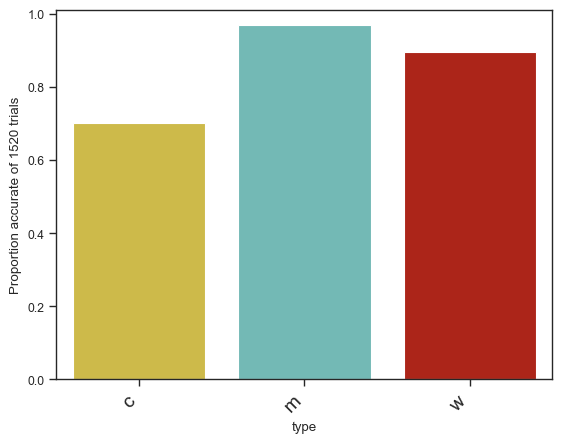

<Axes: xlabel='type', ylabel='Proportion accurate of 1520 trials'>

In [41]:
accplot(acc,'type')

In [42]:
propcorr(acc,'type')


,type,propcorr
0,c,0.700000
1,m,0.968182
2,w,0.894643


In [43]:
cm = confusion(choices,catslist)['vowel']
cm

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,0.57,0.00,0.05,0.01,0.13,0.00,0.00,0.08,0.13,0.03
FLEECE,0.00,0.90,0.00,0.02,0.08,0.00,0.00,0.00,0.00,0.00
FOOT,0.07,0.00,0.56,0.07,0.18,0.05,0.00,0.01,0.07,0.00
GOOSE,0.01,0.09,0.11,0.68,0.11,0.01,0.00,0.00,0.00,0.00
KIT,0.05,0.07,0.13,0.04,0.70,0.00,0.00,0.00,0.01,0.00
NURSE,0.02,0.00,0.03,0.01,0.00,0.88,0.01,0.01,0.03,0.00
PALM,0.01,0.00,0.00,0.00,0.00,0.00,0.51,0.14,0.04,0.30
STRUT,0.15,0.00,0.00,0.00,0.00,0.00,0.12,0.41,0.09,0.23
THOUGHT,0.25,0.00,0.11,0.01,0.03,0.02,0.05,0.18,0.32,0.03
TRAP,0.08,0.00,0.00,0.00,0.00,0.00,0.28,0.20,0.04,0.40
